In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.1.6'

# リカレントニューラルネットワークを理解する

全結合やCNNは記憶を持っていない。RNNはデータ点を処理するステップが１つではない。シーケンスの要素を内部ループで処理する。


## KerasでRNN

SimpleRNNを使う。

In [0]:
from keras.layers import SimpleRNN

 shapeは `(batch_size, timesteps, input_features)`になる。

２つのモード：    
- 各時間刻みの出力が順番に含まれた完全なシーケンスを返すモード。`(batch_size, timesteps, output_features)`    
- 各入力シーケンスの最後の出力だけ返すモード。`(batch_size, output_features)`    
    
２つのモードはコンストラクタ引数のreturn_sequencesで制御される。

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


return_sequences=Trueで完全な状態を表すシーケンスが返される

In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


場合により、複数のリカレントを重ねると表現力を高めることがある。その場合はreturn_sequences=Trueで繋ぐ。

In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


データ前処理

In [6]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


学習

In [7]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.6478 - acc: 0.6078 - val_loss: 0.5117 - val_acc: 0.7792
Epoch 2/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.4296 - acc: 0.8108 - val_loss: 0.4054 - val_acc: 0.8302
Epoch 3/10
 9984/20000 [=============>................] - ETA: 24s - loss: 0.3118 - acc: 0.8727

20000/20000 [==============================] - 51s 3ms/step - loss: 0.3048 - acc: 0.8758 - val_loss: 0.4124 - val_acc: 0.8156
Epoch 4/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.2414 - acc: 0.9043 - val_loss: 0.3761 - val_acc: 0.8458
Epoch 5/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1727 - acc: 0.9360 - val_loss: 0.5213 - val_acc: 0.7654
Epoch 6/10
  384/20000 [..............................] - ETA: 47s - loss: 0.1848 - acc: 0.9297

20000/20000 [==============================] - 51s 3ms/step - loss: 0.1261 - acc: 0.9555 - val_loss: 0.4289 - val_acc: 0.8454
Epoch 7/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.0910 - acc: 0.9707 - val_loss: 0.6807 - val_acc: 0.7986
Epoch 8/10
18432/20000 [==========================>...] - ETA: 3s - loss: 0.0503 - acc: 0.9846

20000/20000 [==============================] - 51s 3ms/step - loss: 0.0543 - acc: 0.9829 - val_loss: 0.5306 - val_acc: 0.8240
Epoch 9/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.0319 - acc: 0.9905 - val_loss: 0.6095 - val_acc: 0.8166
Epoch 10/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.0258 - acc: 0.9917 - val_loss: 0.6776 - val_acc: 0.8018


プロット

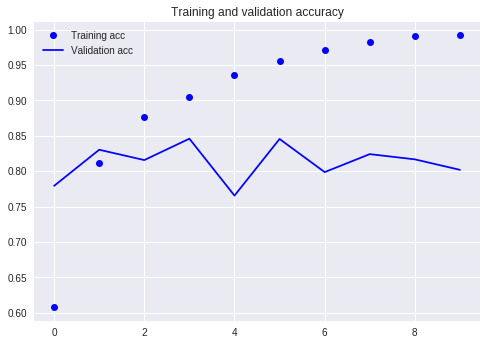

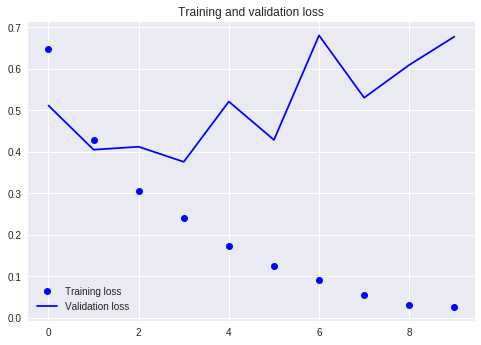

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

テストデータ正解率85%前回より悪くなった。問題は500の再頻出単語に絞ってるのと、SimpleRNNがテキストのような長いシーケンス処理に適してないのが考えられる。

## LSTMとGRU

SimpleRNNは単純すぎるのでLSTMかGRUを使用することになる。LSTMは時間刻みに跨って情報を運ぶ手段が追加されている。処理しているシーケンスと並行して流れるベルトコンベア。必要な時にベルトコンベアから降ろされる。    

内部構造をきちんと理解しても、その理解は限定されている。演算が何をするかは、重みの内容に決まる。同じセルでも重みによって何を行うかが大きく異なることがある。工学的な意味での設計ではなく、モデルの適切な設定を見つけ出すときの制約のあつまりとも見れる。    

研究者から見て制約の選択(RNNのセルの実装方法という問題)はエンジニアがするより遺伝的アルゴリズムや強化学習といった最適化アルゴリズムに任せたほうがいいと見れる。
将来的にはそれがネットワーク構築する方法になるでしょう。    

LSTMセルの何もかもを理解する必要はなく、それは人が理解すべきことではない。何をするものかを覚えておけばいい。LSTMセルは過去の情報を後から再注入することで勾配消失問題に対処する。


## KerasでのLSTMの具体的な例



In [9]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 205s 10ms/step - loss: 0.5050 - acc: 0.7655 - val_loss: 0.3618 - val_acc: 0.8682
Epoch 2/10
20000/20000 [==============================] - 204s 10ms/step - loss: 0.2897 - acc: 0.8877 - val_loss: 0.3574 - val_acc: 0.8568
Epoch 3/10
 9600/20000 [=============>................] - ETA: 1:40 - loss: 0.2272 - acc: 0.9120

20000/20000 [==============================] - 205s 10ms/step - loss: 0.2324 - acc: 0.9099 - val_loss: 0.2735 - val_acc: 0.8938
Epoch 4/10
20000/20000 [==============================] - 205s 10ms/step - loss: 0.1940 - acc: 0.9271 - val_loss: 0.5887 - val_acc: 0.8294
Epoch 5/10
20000/20000 [==============================] - 206s 10ms/step - loss: 0.1749 - acc: 0.9357 - val_loss: 0.2893 - val_acc: 0.8882


Epoch 6/10
20000/20000 [==============================] - 205s 10ms/step - loss: 0.1565 - acc: 0.9430 - val_loss: 0.4216 - val_acc: 0.8718
Epoch 7/10
20000/20000 [==============================] - 206s 10ms/step - loss: 0.1412 - acc: 0.9492 - val_loss: 0.3178 - val_acc: 0.8906
Epoch 8/10
16256/20000 [=======================>......] - ETA: 36s - loss: 0.1308 - acc: 0.9563

20000/20000 [==============================] - 205s 10ms/step - loss: 0.1326 - acc: 0.9549 - val_loss: 0.3121 - val_acc: 0.8766
Epoch 9/10
20000/20000 [==============================] - 206s 10ms/step - loss: 0.1111 - acc: 0.9608 - val_loss: 0.4569 - val_acc: 0.8192
Epoch 10/10
20000/20000 [==============================] - 206s 10ms/step - loss: 0.1120 - acc: 0.9609 - val_loss: 0.3645 - val_acc: 0.8840


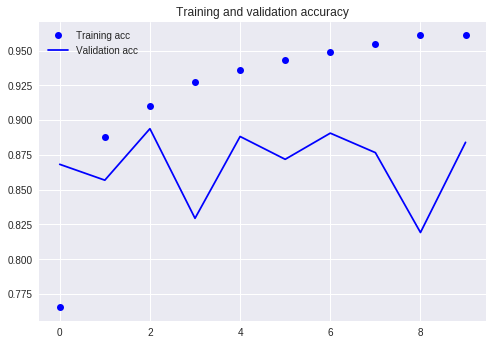

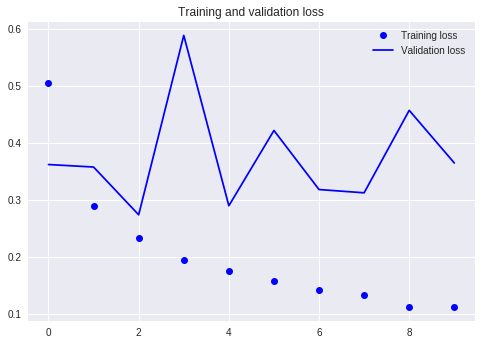

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

検証データで89%の正解率になった。勾配消失問題が改善された。    
ですが計算負荷が高いわりには精度が上がってない。理由の１つは、埋め込みの次元数やLSTMの出力の次元数のチューニングをしてないこと。また正則化も。    
またLSTMでは映画レビューの大域的かつ長期的な構造の分析が感情分析問題では役に立たない。確かに感情分析は文字の順番より単語頻度で十分精度が出そう。    

この問題は全結合アプローチのように各レビューに出現する単語頻度で十分解決できる。